https://www.kaggle.com/datasets/meraxes10/fantasy-premier-league-dataset-2023-2024


# Fantasy EPL Player Selection and Performance Simulation

Each year, over 10 million people around the world participate in Fantasy English Premier League (FPL) competitions—not just for a chance to win money, but also for the bragging rights among their peers. With buy-ins ranging from free to over $100 per player, these leagues can become highly competitive.

Inspired by the analytical approach popularized in the movie Moneyball, I applied decision analytics to identify the optimal players for building a winning team, using a range of performance metrics and strategic constraints.

## Importing packages
gurobipy is used to build and solve the binary optimization model for selecting the optimal fantasy team under multiple constraints.

pandas and numpy are utilized to clean, manipulate, and structure the player performance data for analysis and modeling.

matplotlib.pyplot is employed to visualize team composition and performance metrics, helping to interpret and communicate the results effectively.

In [ ]:
from gurobipy import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Data and EDA (Exploratory Data Analysis)

In [2]:
players = pd.read_csv("FPL_2018_19_Wk0.csv")

In [3]:
players.info()
players.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player ID         472 non-null    int64  
 1   Name              472 non-null    object 
 2   Team              472 non-null    object 
 3   Position          472 non-null    object 
 4   Cost              472 non-null    int64  
 5   Creativity        472 non-null    float64
 6   Influence         472 non-null    float64
 7   Threat            472 non-null    int64  
 8   ICT               472 non-null    float64
 9   Goals_conceded    472 non-null    int64  
 10  Goals_scored      472 non-null    int64  
 11  Assists           472 non-null    int64  
 12  Own_goals         472 non-null    int64  
 13  Penalties_missed  472 non-null    int64  
 14  Penalties_saved   472 non-null    int64  
 15  Saves             472 non-null    int64  
 16  Yellow_cards      472 non-null    int64  
 1

(472, 22)

In [4]:
position_count = players['Position'].value_counts()

print(position_count)

MID    188
DEF    171
FWD     66
GKP     47
Name: Position, dtype: int64


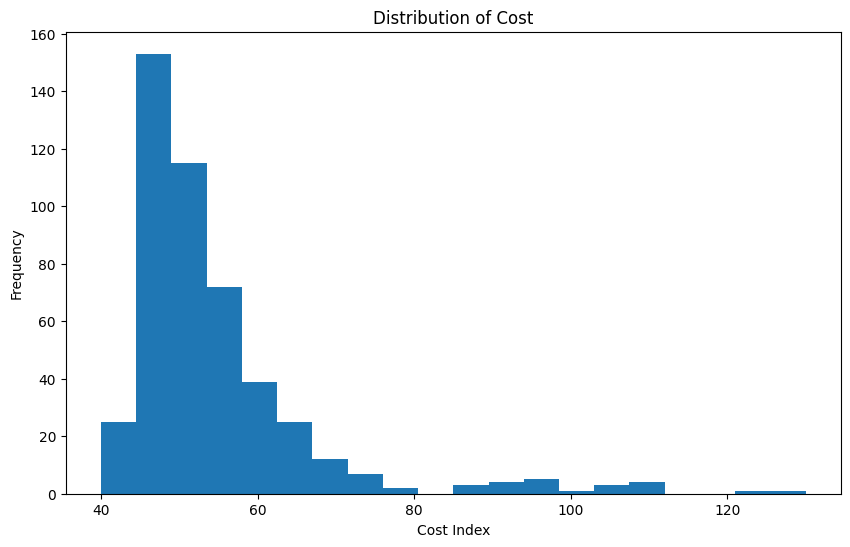

In [5]:
# Histogram to show Cost Distribution
plt.figure(figsize=(10, 6))
plt.hist(players['Cost'], bins=20)
plt.title('Distribution of Cost')
plt.xlabel('Cost Index')
plt.ylabel('Frequency')
plt.show()

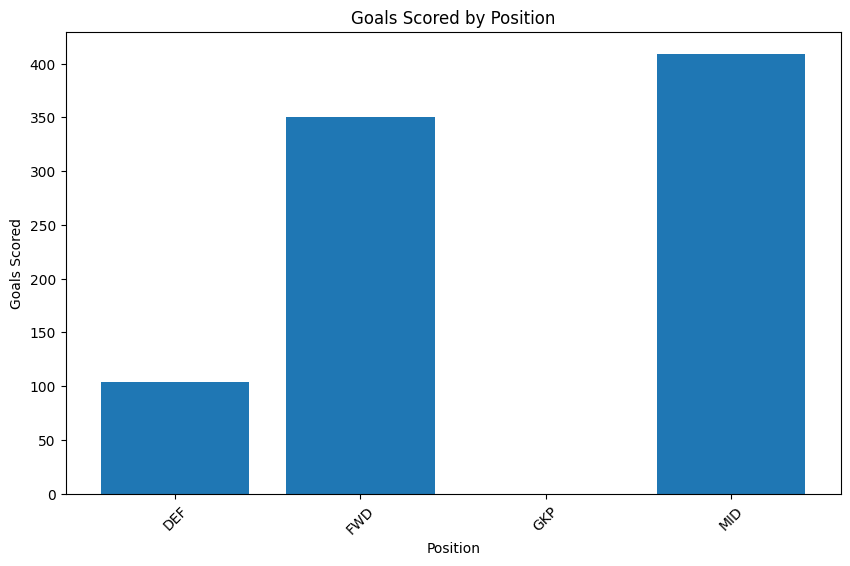

In [6]:
#Bar Chart to show Goals per Position
goals_by_position = players.groupby('Position')['Goals_scored'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(goals_by_position['Position'], goals_by_position['Goals_scored'])
plt.xlabel('Position')
plt.ylabel('Goals Scored')
plt.title('Goals Scored by Position')
plt.xticks(rotation=45)  
plt.show()



In [7]:
# Player with the most Goals
max_goals_index = players['Goals_scored'].idxmax()

# Locate the row and print the player's name and the number of goals
player_with_most_goals = players.loc[max_goals_index]
print(f"Player with the most goals: {player_with_most_goals['Name']} - {player_with_most_goals['Goals_scored']} goals")


Player with the most goals: Salah - 32 goals


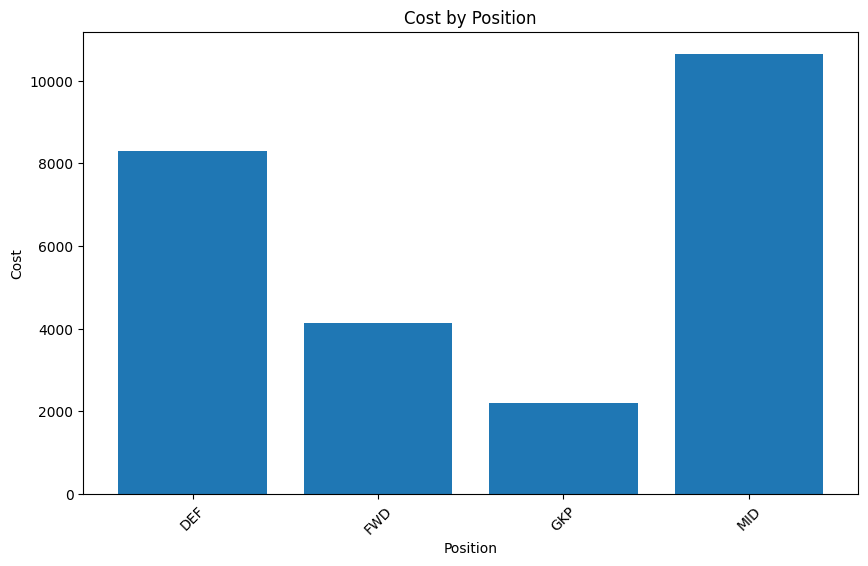

In [8]:
#Bar Chart to show which Position has the most expensive players
cost_by_position = players.groupby('Position')['Cost'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(goals_by_position['Position'], cost_by_position['Cost'])
plt.xlabel('Position')
plt.ylabel('Cost')
plt.title('Cost by Position')
plt.xticks(rotation=45)  
plt.show()

In [9]:
# Most Expensive Player
expensive = players['Goals_scored'].idxmax()

# Locate the row and print the player's name and the number of goals
most_expensive_player = players.loc[expensive]
print(f"The most expensive player in the Data is: {most_expensive_player['Name']} - {most_expensive_player['Cost']} million pounds")
print("Note: Cost is given in units of 0.1 million pounds, therefore he costs 13 million pounds.")



The most expensive player in the Data is: Salah - 130 million pounds
Note: Cost is given in units of 0.1 million pounds, therefore he costs 13 million pounds.


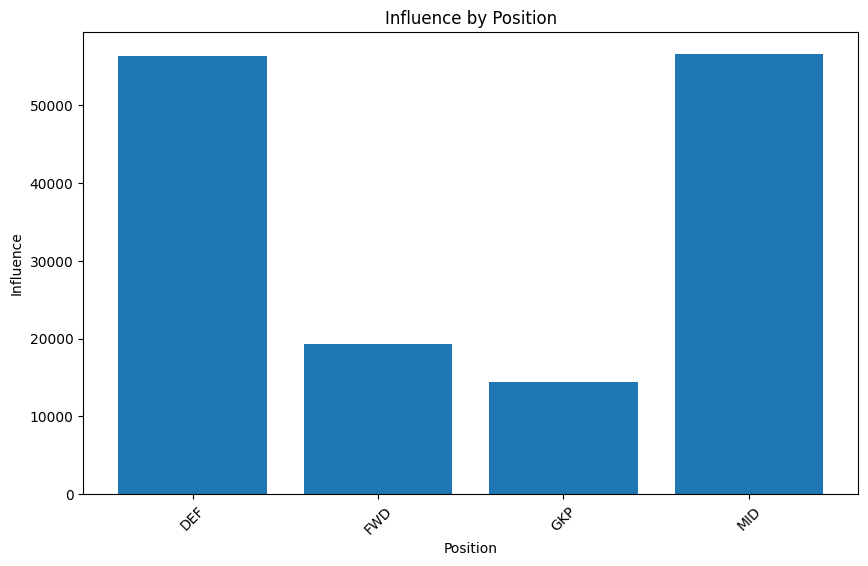

In [10]:
#Bar Chart to show which Position has the most influential players
influence_by_position = players.groupby('Position')['Influence'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(goals_by_position['Position'], influence_by_position['Influence'])
plt.xlabel('Position')
plt.ylabel('Influence')
plt.title('Influence by Position')
plt.xticks(rotation=45)  
plt.show()

In [11]:
# Most Influenctial Player
influence = players['Influence'].idxmax()

# Locate the row and print the player's name and the Influence score
most_influence_player = players.loc[influence]
print(f"The most Influential player in the Data is: {most_influence_player['Name']} - {most_influence_player['Influence']} ")




The most Influential player in the Data is: Salah - 1496.2 


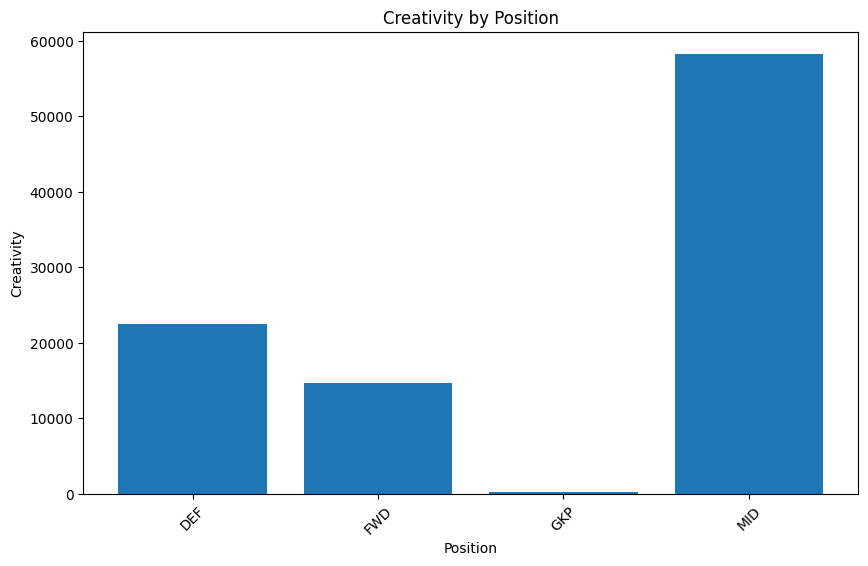

In [12]:
#Bar Chart to show which Position has the most Creative players
creativity_by_position = players.groupby('Position')['Creativity'].sum().reset_index()
#This is a value that examines a player's threat on goal. 
#It gauges the individuals most likely to score goals.

plt.figure(figsize=(10, 6))
plt.bar(goals_by_position['Position'], creativity_by_position['Creativity'])
plt.xlabel('Position')
plt.ylabel('Creativity')
plt.title('Creativity by Position')
plt.xticks(rotation=45)  
plt.show()

In [13]:
# Most Creative Player
creative = players['Creativity'].idxmax()

# Locate the row and print the player's name and Threat Score
most_creative_player = players.loc[creative]
print(f"The most Creative player in the Data is: {most_creative_player['Name']} - {most_creative_player['Creativity']} ")




The most Creative player in the Data is: De Bruyne - 1744.2 


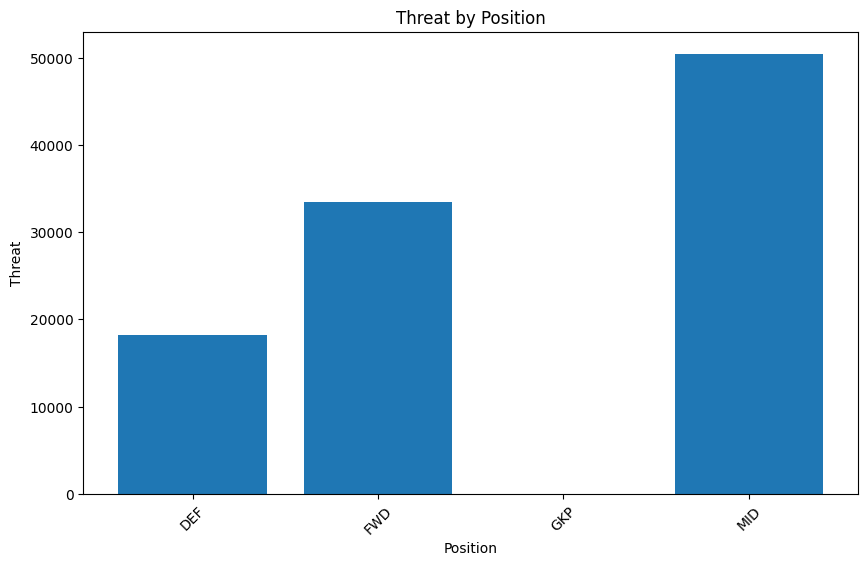

In [14]:
threat_by_position = players.groupby('Position')['Threat'].sum().reset_index()
#This is a value that examines a player's threat on goal. 
#It gauges the individuals most likely to score goals.

plt.figure(figsize=(10, 6))
plt.bar(goals_by_position['Position'], threat_by_position['Threat'])
plt.xlabel('Position')
plt.ylabel('Threat')
plt.title('Threat by Position')
plt.xticks(rotation=45)  
plt.show()

In [15]:
# Most threatening Player
threat = players['Threat'].idxmax()

# Locate the row and print the player's name and Threat Score
most_threat_player = players.loc[threat]
print(f"The most threatening player in the Data is: {most_threat_player['Name']} - {most_threat_player['Threat']} ")




The most threatening player in the Data is: Kane - 2355 


## Building the Model 


In [16]:
model = Model("Soccer_Lineup_Optimization")
x = {}

Restricted license - for non-production use only - expires 2025-11-24


In [17]:
categories = [('Defender', 1, 171), ('Forward', 172, 237), ('Goalkeeper', 238, 284), ('Midfielder', 285, len(players))]
for category, start, end in categories:
    for i in players.loc[start:end, 'Player ID']:
        x[i] = model.addVar(vtype=GRB.BINARY, name=f"{category}_{i}")

In [18]:
model.update()

In [19]:
# Reset the objective function
model.setObjective(0, GRB.MAXIMIZE)

# Iterate over each player to add their part to the objective function
for i, player in players.iterrows():
    player_id = player['Player ID']
    position = player['Position']  

    if player_id in x:  # Check if player_id is in the dictionary
        
        # For forwards, maximize goals scored
        if position == 'Forward':
            goals_scored = player['Goals_scored']
            model.setObjective(model.getObjective() + goals_scored * x[player_id], GRB.MAXIMIZE)
        
        # For midfielders, maximize assists
        elif position == 'Midfielder':
            assists = player['Assists']
            model.setObjective(model.getObjective() + assists * x[player_id], GRB.MAXIMIZE)
        
        # For defenders, minimize goals conceded
        elif position == 'Defender':
            goals_conceded = player['Goals_conceded']
            model.setObjective(model.getObjective() - goals_conceded * x[player_id], GRB.MAXIMIZE)
        
        # For goalkeepers, maximize saves
        elif position == 'Goalkeeper':
            saves = player['Saves']  
            model.setObjective(model.getObjective() + saves * x[player_id], GRB.MAXIMIZE)


## Model Constraints

In [20]:
#Constraints:

#Delinquency Constraint: Less than 2 yellow cards and 0 Reds
for i, player in players.iterrows():
    player_id = player['Player ID']
    yellow_cards = player['Yellow_cards']
    red_cards = player['Red_cards']
    player_id = player['Player ID']
    ict_index = player['ICT']   
    
    if player_id in x:  
        
        # Constraint for yellow 
        if yellow_cards >= 2:
            # If a player has 2 or more yellow cards, they cannot be selected
            model.addConstr(x[player_id] == 0, f"Yellow_Card_Constraint_{player_id}")
        
        # Constraint for red 
        if red_cards > 0:
            # If a player has any red cards, they cannot be selected
            model.addConstr(x[player_id] == 0, f"Red_Card_Constraint_{player_id}")
        
        #Constraint for ICT (Influence, Creativity, Threat Index), exclude players with ICT Index less than 100
        if ict_index <= 100:
            model.addConstr(x[player_id] == 0, f"ICT_Limit_{player_id}")



# Goalkeeper Constraint:  1 GK
gk_constraint = sum(x[player_id] for player_id, var in x.items() if "Goalkeeper" in var.VarName)
model.addConstr(gk_constraint == 1, "GK_Constraint")

# Defender Constraint:  4 DFs
df_constraint = sum(x[player_id] for player_id, var in x.items() if "Defender" in var.VarName)
model.addConstr(df_constraint == 4, "DF_Constraint")

# Midfielder Constraint:  3 MIDs
mid_constraint = sum(x[player_id] for player_id, var in x.items() if "Midfielder" in var.VarName)
model.addConstr(mid_constraint == 3, "MID_Constraint")

# Forward Constraint:  3 FWDs
fwd_constraint = sum(x[player_id] for player_id, var in x.items() if "Forward" in var.VarName)
model.addConstr(fwd_constraint == 3, "FWD_Constraint")

# Cost Constraint Team less than 800
budget_constraint = sum(players.set_index('Player ID').loc[player_id, 'Cost'] * var for player_id, var in x.items())
model.addConstr(budget_constraint <= 800, "Budget_Constraint")


<gurobi.Constr *Awaiting Model Update*>

In [21]:
# Optimize the model
model.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[rosetta2] - Darwin 22.5.0 22F66)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 582 rows, 471 columns and 1519 nonzeros
Model fingerprint: 0xe3f47172
Variable types: 0 continuous, 471 integer (471 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Found heuristic solution: objective -0.0000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: -0 
No other solutions better than -0

Optimal solution found (tolerance 1.00e-04)
Best objective -0.000000000000e+00, best bound -0.000000000000e+00, gap 0.0000%


## Model Results


In [22]:
player_names = {}  # Dictionary to map player IDs to names

for i, player in players.iterrows():
    player_id = player['Player ID']
    player_name = player['Name']  
    player_names[player_id] = player_name  

In [23]:
# Example to print the selected players
for player_id, var in x.items():
    if var.X > 0.5:  
        print(f"Selected Player: {player_id} - {var.VarName}")

Selected Player: 6 - Defender_6
Selected Player: 42 - Defender_42
Selected Player: 151 - Defender_151
Selected Player: 170 - Defender_170
Selected Player: 174 - Forward_174
Selected Player: 191 - Forward_191
Selected Player: 204 - Forward_204
Selected Player: 254 - Goalkeeper_254
Selected Player: 331 - Midfielder_331
Selected Player: 339 - Midfielder_339
Selected Player: 354 - Midfielder_354


In [24]:
# After model optimization
for player_id, var in x.items():
    if var.X > 0.5:  
        player_name = player_names[player_id]
        print(f"Selected Player: {player_name}")

Selected Player: Azpilicueta
Selected Player: Daniels
Selected Player: Trippier
Selected Player: van Dijk
Selected Player: Aubameyang
Selected Player: Giroud
Selected Player: Lacazette
Selected Player: Fabianski
Selected Player: Eriksen
Selected Player: Fraser
Selected Player: Hendrick


In [25]:
# Initialize a variable to hold the total cost
total_cost = 0

# Iterate over each player's decision variable
for player_id, var in x.items():
    
    if var.X > 0.5:  
       
        player_cost = players.set_index('Player ID').loc[player_id, 'Cost']
        total_cost += player_cost

# Print the total cost of the selected team
print(f"Total cost of the selected team: {total_cost}")


Total cost of the selected team: 765


In [26]:
# Initialize a variable to hold the total cost
total_goals = 0


for player_id, var in x.items():
    
    if var.X > 0.5:  
       
        player_goals = players.set_index('Player ID').loc[player_id, 'Goals_scored']
        total_goals += player_goals

# Print the total cost of the selected team
print(f"Total goals of the selected team: {total_goals}")

Total goals of the selected team: 52


## Model Simulation

In [119]:
#Forwards

import numpy as np
np.random.seed(1)
# Simulation parameters
num_simulations = 32  # Number of simulated games
game_duration = 90  

# Results dictionary to store goals per player
simulation_results = {}


for player_id, var in x.items():
    if var.X > 0.5:  
        player_name = players.loc[players['Player ID'] == player_id, 'Name'].values[0]
        position = players.loc[players['Player ID'] == player_id, 'Position'].values[0]
        
        # Filter players "FWD"
        if position == "FWD":
            goals_scored = players.loc[players['Player ID'] == player_id, 'Goals_scored'].values[0]
            total_minutes = players.loc[players['Player ID'] == player_id, 'Minutes'].values[0]

           
            if total_minutes > 0: 
                goals_per_minute = goals_scored / total_minutes
            else:
                goals_per_minute = 0

        
            goals_in_simulation = 0
            for _ in range(num_simulations):
               
                if np.random.rand() < (goals_per_minute * game_duration):
                    goals_in_simulation += 1

            
            simulation_results[player_name] = goals_in_simulation

# Print the expected number of goals per player over the simulated games
for player_name, goals in simulation_results.items():
    print(f"{player_name} is expected to score {goals} times in {num_simulations} games.")


Aubameyang is expected to score 26 times in 32 games.
Giroud is expected to score 24 times in 32 games.
Lacazette is expected to score 21 times in 32 games.


In [120]:
#Midfielders
import numpy as np
np.random.seed(1)

num_simulations = 32  # Number of simulated games
game_duration = 90  


simulation_results = {}


for player_id, var in x.items():
    if var.X > 0.5:  
        player_name = players.loc[players['Player ID'] == player_id, 'Name'].values[0]
        position = players.loc[players['Player ID'] == player_id, 'Position'].values[0]
        
        # Filter players "MID"
        if position == "MID":
            assists = players.loc[players['Player ID'] == player_id, 'Assists'].values[0]
            total_minutes = players.loc[players['Player ID'] == player_id, 'Minutes'].values[0]

            
            if total_minutes > 0:  
                assists_per_minute = assists / total_minutes
            else:
                assists_per_minute = 0

            
            assists_in_simulation = 0
            for _ in range(num_simulations):
                
                if np.random.rand() < (assists_per_minute * game_duration):
                    assists_in_simulation += 1

            
            simulation_results[player_name] = assists_in_simulation

# Print the expected number of assists per player over the simulated games
for player_name, assists in simulation_results.items():
    print(f"{player_name} is expected to make {assists} assists in {num_simulations} games.")


Eriksen is expected to make 8 assists in 32 games.
Fraser is expected to make 5 assists in 32 games.
Hendrick is expected to make 3 assists in 32 games.


In [118]:
#Defenders
import numpy as np
import pandas as pd
from scipy.stats import poisson
np.random.seed(1)

num_simulations = 32  # Number of simulated games
game_duration = 90  


simulation_results = {}


for player_id, var in x.items():
    if var.X > 0.5:  
        player_info = players[players['Player ID'] == player_id].iloc[0]
        player_name = player_info['Name']
        goals_conceded = player_info['Goals_conceded']
        total_minutes = player_info['Minutes']
        player_position = player_info['Position']

        if player_position == "DEF":
            
            if total_minutes > 0:  
                goals_conceded_per_minute = goals_conceded / total_minutes
            else:
                goals_conceded_per_minute = 0

            
            expected_goals_conceded = poisson(mu=goals_conceded_per_minute * game_duration).rvs(num_simulations)

            
            simulation_results[player_name] = np.mean(expected_goals_conceded)


for player_name, avg_goals_conceded in simulation_results.items():
    print(f"{player_name} is expected to concede {avg_goals_conceded:.2f} goals on average per game.")


Azpilicueta is expected to concede 1.56 goals on average per game.
Daniels is expected to concede 1.69 goals on average per game.
Trippier is expected to concede 0.94 goals on average per game.
van Dijk is expected to concede 1.09 goals on average per game.


In [125]:
#GK
import numpy as np
np.random.seed(1)

num_simulations = 32  # Number of simulated games
game_duration = 90  


simulation_results = {}

# Iterate over each selected player
for player_id, var in x.items():
    if var.X > 0.5:  
        player_name = players.loc[players['Player ID'] == player_id, 'Name'].values[0]
        position = players.loc[players['Player ID'] == player_id, 'Position'].values[0]
        
        
        if position == "GKP":
            saves = players.loc[players['Player ID'] == player_id, 'Saves'].values[0]
            total_minutes = players.loc[players['Player ID'] == player_id, 'Minutes'].values[0]

            
            if total_minutes > 0:  
                saves_per_minute = saves / total_minutes
            else:
                saves_per_minute = 0

            
            saves_in_simulation = 0
            for _ in range(num_simulations):
                
                if np.random.rand() < (saves_per_minute * game_duration):
                    saves_in_simulation += 1

            
            simulation_results[player_name] = saves_in_simulation

# Print the expected number of saves per player over the simulated games
for player_name, saves in simulation_results.items():
    print(f"{player_name} is expected to make {saves} saves in {num_simulations} games.")


Fabianski is expected to make 32 saves in 32 games.


## Final Analysis

The optimized fantasy soccer team achieved a total of 52 goals within budget constraints (£762), using a data-driven selection model. A Poisson distribution was applied to simulate expected performance—goals for forwards, assists for midfielders, and goals conceded by defenders—based on historical data. While the model effectively highlights high-value and underrated players, it has limitations, including assumptions about data variance, potential misfit for 0-0 games, and a lack of real-time adaptability. Notably, the model does not account for unpredictable factors such as player injuries or sudden performance drops. Despite these constraints, the approach offers a strong foundation for making analytical, informed player selections to optimize fantasy team performance.